In [1]:
#Importa funções
from funcoesTermosol import *
from jacobi_gauss import *

In [2]:
def matprint(mat, fmt="g"):        # Credits to braingineer https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

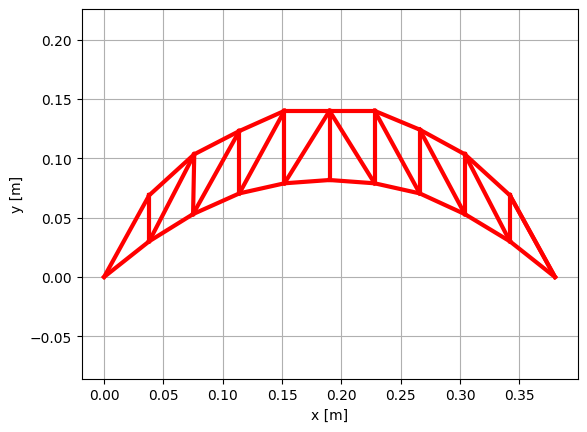

In [3]:
#Lê arquivo de entrada
nn,N,nm,Inc,nc,F,nr,R = importa('entrada-ponte.xls')
plota(N,Inc)

In [4]:
#Cria os nos e elementos
nos = cria_nos(nn,N,F)
elementos = cria_elementos(nm,Inc,nos)

In [5]:
#Calcula as Matrizes de Rigidez
for elemento in elementos:
    matriz_rigidez = calcula_matriz_rigidez(elemento)
    elemento.setMatrizRigidez(matriz_rigidez)

In [6]:
#Calcula a matriz de rigidez universal
K_G = get_matriz_universal(nn,nm,elementos)
temp = K_G

In [7]:
#Inverte o array de R
R_invertido = np.zeros_like(R)
cont = len(R)-1
i = 0
while cont>=0:
    R_invertido[i] = R[cont]
    cont -=1
    i+=1

R_invertido

array([[21.],
       [ 1.],
       [20.],
       [ 0.]])

In [8]:
F_alterado = F
mask_K_G = np.ones(K_G.shape[0],bool)
mask_F = np.ones(K_G.shape[0],bool)
for restricao in R_invertido:
    mask_K_G[int(restricao[0])] = 0
    mask_F[int(restricao[0])] = 0

K_G_alterado = K_G[mask_K_G,:][:,mask_K_G]
F_alterado = F[mask_F,:]


In [9]:

U = np.linalg.inv(K_G_alterado)@F_alterado
U2 = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2[i] = U[cont]
        cont+=1

Reac = np.dot(temp,U2)
Reacoes_final = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final[cont] = Reac[i]
        cont+=1

deformacoes,tensoes,forcas = get_lista_deformacoes_forcas_tensoes(U2,elementos)

geraSaida("Numpy",Reacoes_final,U2,deformacoes,forcas,tensoes)

In [10]:
U_jacobi = jacobi(K_G_alterado,F_alterado,10000,1e-20)
U2_jacobi = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2_jacobi[i] = U_jacobi[cont]
        cont+=1

Reac_jacobi = np.dot(temp,U2_jacobi)
Reacoes_final_jacobi = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final_jacobi[cont] = Reac_jacobi[i]
        cont+=1

deformacoes_jacobi,tensoes_jacobi,forcas_jacobi = get_lista_deformacoes_forcas_tensoes(U2_jacobi,elementos)

geraSaida("Jacobi",Reacoes_final_jacobi,U2_jacobi,deformacoes_jacobi,forcas_jacobi,tensoes_jacobi)

6.8924024414156674e+274


/home/perubr12/Desktop/Insper/Transcal/APS4_Transacal/jacobi_gauss.py:13: RuntimeWarning: invalid value encountered in divide
  erro = np.divide(np.subtract(x,x_antigo),x + 1e-15)
/home/perubr12/Desktop/Insper/Transcal/APS4_Transacal/jacobi_gauss.py:12: RuntimeWarning: invalid value encountered in add
  x[i] = ((b[i]-np.dot(linha,x_antigo))/linha[i]) + x[i]


In [11]:
U_seidel = seidel(K_G_alterado,F_alterado,10000,1e-20)
U2_seidel = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2_seidel[i] = U_seidel[cont]
        cont+=1

Reac_seidel = np.dot(temp,U2_seidel)
Reacoes_final_seidel = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final_seidel[cont] = Reac_seidel[i]
        cont+=1

deformacoes_seidel,tensoes_seidel,forcas_seidel = get_lista_deformacoes_forcas_tensoes(U2_seidel,elementos)

geraSaida("Seidel",Reacoes_final_seidel,U2_seidel,deformacoes_seidel,forcas_seidel,tensoes_seidel)